In [ ]:
import numpy as np
import sys
import skimage.io as io
from skimage.color import rgb2gray

In [ ]:
img = io.imread('cat.jpg')
gray_img = rgb2gray(img)


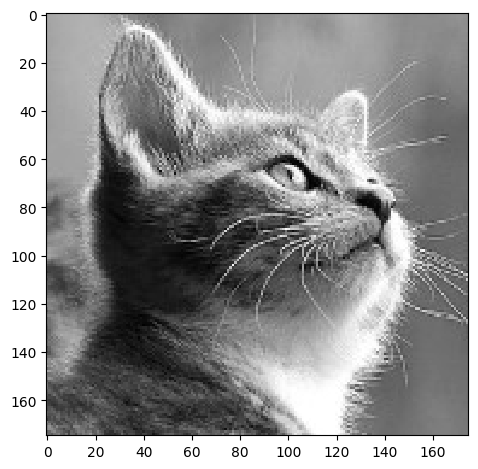

In [ ]:
io.imshow(gray_img)
io.show()

In [ ]:
def ReLU(element):
  return np.maximum(0, element)

In [ ]:
def dot_sum(matrix):
  sum = 0
  for row in matrix:
    for element in row:
      sum += element

  return sum

In [ ]:
def conv(img, fsize=(3,3), activation="ReLU"):
  # first perform checks
    if fsize[0] != fsize[1]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()

    if fsize[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

  # create a randomly initialized filter of dimensions specified in fsize
    filter = np.random.rand(fsize[0],fsize[1])

  # get sizes
    img_h, img_w = img.shape[0], img.shape[1]

    filter_h, filter_w = filter.shape[0], filter.shape[1]

  # calculate output feature map shape
    fmap_h = img_h - filter_h + 1
    fmap_w = img_w - filter_w + 1

  # create fmap matrix
    fmap = np.zeros((fmap_h, fmap_w))

  # for simplicity stride isn't considered right now
  # based on the activation string apply the particular activation function
  # default at the moment will be ReLU

    for i in range(fmap_h):
      for j in range(fmap_w):
        dot_prod = img[i:i+filter_h, j:j+filter_w] * filter
        fmap[i,j] = ReLU(dot_sum(dot_prod))

    return fmap



In [ ]:
first_layer = conv(gray_img, (3,3), "ReLU")

In [ ]:
# input image
gray_img.shape

(175, 175)

In [ ]:
# output fmap after filter (3x3) was applied
first_layer.shape

(173, 173)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


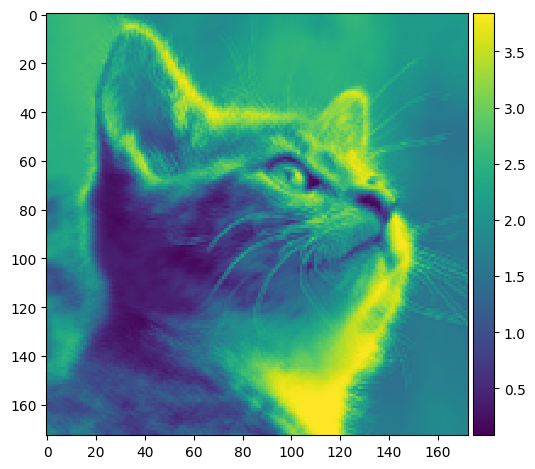

In [ ]:
io.imshow(first_layer)
io.show()

In [ ]:
filter = np.random.rand(2,2)

In [ ]:
filter

array([[0.26515115, 0.90553052],
       [0.29976888, 0.28763841]])